In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
# Replace this with loading your actual dataset
from sklearn.datasets import make_classification


def run_training_loop(X, y, task="a", class_weight: str = 'balanced', verbose: bool = False,  average='micro'):
    
    
    # Define classifiers
    classifiers = {
    "Logistic Regression": LogisticRegression(class_weight=class_weight),
    "Decision Tree": DecisionTreeClassifier(class_weight=class_weight),
    "Random Forest": RandomForestClassifier(class_weight=class_weight),
    "Support Vector Machine": SVC(class_weight=class_weight, probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "K-Nearest Neighbors Rigid": KNeighborsClassifier(n_neighbors=50)
    }

    # Stratified K-Fold Cross Validation
    skf = StratifiedKFold(n_splits=10, shuffle=True)

    # Metrics storage
    results = {name: {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []} for name in classifiers.keys()}

    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Standardize features
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)

        for name, clf in classifiers.items():
            # Train the classifier
            clf.fit(X_train, y_train)
            
            # Predict
            y_pred = clf.predict(X_val)
            
            # Calculate metrics
            acc = accuracy_score(y_val, y_pred)
            precision = precision_score(y_val, y_pred, average=average)
            recall = recall_score(y_val, y_pred, average=average)
            f1 = f1_score(y_val, y_pred, average=average)
            
            # Store metrics
            results[name]['accuracy'].append(acc)
            results[name]['precision'].append(precision)
            results[name]['recall'].append(recall)
            results[name]['f1_score'].append(f1)

        if verbose:
            # Display results
            for name, metrics in results.items():
                print(f"Classifier: {name}")
                print(f"  Accuracy:  {np.mean(metrics['accuracy']):.4f} ± {np.std(metrics['accuracy']):.4f}")
                print(f"  Precision: {np.mean(metrics['precision']):.4f} ± {np.std(metrics['precision']):.4f}")
                print(f"  Recall:    {np.mean(metrics['recall']):.4f} ± {np.std(metrics['recall']):.4f}")
                # print(f"  F1 Score:  {np.mean(metrics['f1_score']):.4f} ± {np.std(metrics['f1_score']):.4f}")
                print()

            # Detailed classification report for each classifier on the last fold
            for name, clf in classifiers.items():
                y_pred = clf.predict(X_test)
                print(f"Classifier: {name}")
                print(classification_report(y_test, y_pred))
                print()
    return results

In [34]:
def print_pca_variance(X_train, n_components=2):
    pca = PCA(n_components=n_components)

    X_train = StandardScaler().fit_transform(X_train)
    X_train = pca.fit_transform(X_train)
    print(pca.explained_variance_ratio_)
    
def get_distribution(y):
    unique, counts = np.unique(y, return_counts=True)
    return dict(zip(unique, counts))

def standard_scale(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
    X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
    return X_train, X_test





In [36]:

data = pd.read_csv("data/Fish3.txt", delimiter=" ")

X = data.drop(columns=['Species'])
y = data['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print_pca_variance(X_train, n_components=2)

[0.64738896 0.25592077]


In [38]:
get_distribution(y_train)

{'Bream': 449,
 'Perch': 292,
 'Pike': 189,
 'Roach': 164,
 'SilverBream': 190,
 'Smelt': 178,
 'Whitewish': 30}

In [41]:

X_train_scaled, X_test_scaled = standard_scale(X_train, X_test)
results = run_training_loop(X_train_scaled, y_train, task="a", class_weight=None, average=None)

/Users/rikard/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rikard/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rikard/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/

In [ ]:
results

In [29]:
from imblearn.over_sampling import SMOTE

# Example using SMOTE
smote = SMOTE(random_state=42)
X_scaled, y_train = smote.fit_resample(X_train_scaled, y_train)

# Train a classifier with resampled data
# clf.fit(X_resampled, y_resampled)


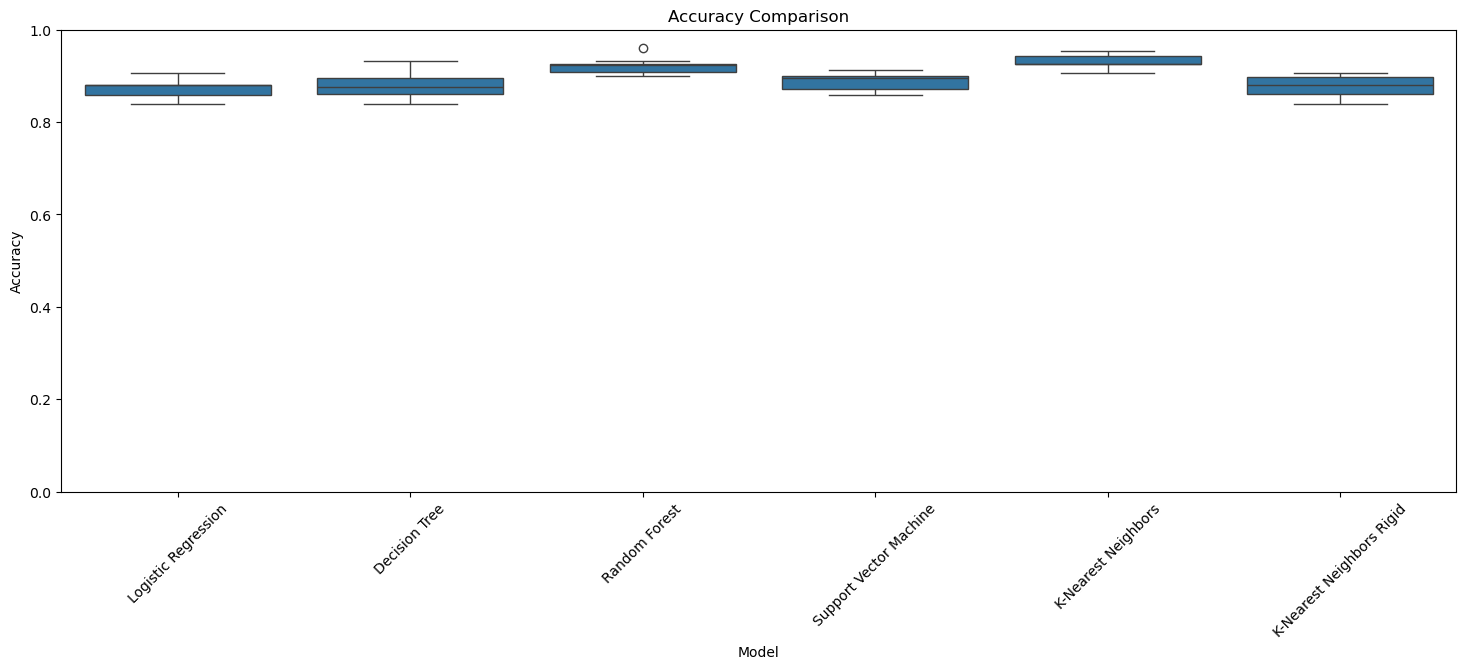

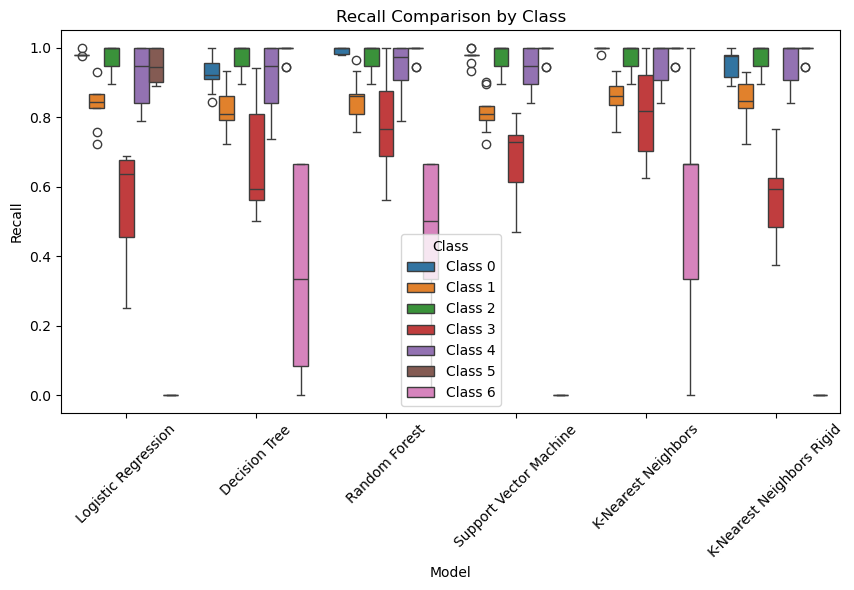

In [64]:
accuracy_data = []
precision_data = []
recall_data = []

for model, metrics in results.items():
    # Accuracy
    for acc in metrics["accuracy"]:
        accuracy_data.append([model, acc])
    
    # Precision and Recall for each class
    for fold in range(len(metrics["precision"])):
        for class_idx, prec in enumerate(metrics["precision"][fold]):
            precision_data.append([model, f'Class {class_idx}', prec])
        for class_idx, rec in enumerate(metrics["recall"][fold]):
            recall_data.append([model, f'Class {class_idx}', rec])

# Convert to DataFrame for easier plotting
accuracy_df = pd.DataFrame(accuracy_data, columns=["Model", "Accuracy"])
precision_df = pd.DataFrame(precision_data, columns=["Model", "Class", "Precision"])
recall_df = pd.DataFrame(recall_data, columns=["Model", "Class", "Recall"])

# Plotting
plt.figure(figsize=(18, 6))

# Boxplot for Accuracies

sns.boxplot(x="Model", y="Accuracy", data=accuracy_df)
plt.title('Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(25, 6))

# Boxplot for Precision
plt.subplot(1, 2, 1)
sns.boxplot(x="Model", y="Precision", hue="Class", data=precision_df)
plt.title('Precision Comparison by Class')
plt.xticks(rotation=45)
plt.legend(title='Class')

# Boxplot for Recall
plt.subplot(1, 3, 2)
sns.boxplot(x="Model", y="Recall", hue="Class", data=recall_df)
plt.title('Recall Comparison by Class')
plt.xticks(rotation=45)
plt.legend(title='Class')

plt.tight_layout()
plt.show()

In [61]:
results

{'Logistic Regression': {'accuracy': [0.88,
   0.8733333333333333,
   0.8523489932885906,
   0.8791946308724832,
   0.8389261744966443,
   0.9060402684563759,
   0.8791946308724832,
   0.8523489932885906,
   0.8791946308724832,
   0.8926174496644296],
  'precision': [array([0.88      , 0.72972973, 1.        , 0.91666667, 0.9375    ,
          1.        , 0.        ]),
   array([0.97777778, 0.6875    , 1.        , 0.58823529, 0.95      ,
          1.        , 0.        ]),
   array([0.91666667, 0.63157895, 1.        , 0.7       , 0.94736842,
          1.        , 0.        ]),
   array([0.89795918, 0.76470588, 1.        , 0.71428571, 0.9375    ,
          1.        , 0.        ]),
   array([0.83018868, 0.68421053, 1.        , 0.75      , 0.94117647,
          1.        , 0.        ]),
   array([1.        , 0.75      , 1.        , 0.64705882, 1.        ,
          1.        , 0.        ]),
   array([0.93617021, 0.75      , 1.        , 0.64705882, 0.9       ,
          1.        , 0.     

In [60]:
precision_data

[['Logistic Regression', 'Class 0', 0.88],
 ['Logistic Regression', 'Class 0', 0.7297297297297297],
 ['Logistic Regression', 'Class 0', 1.0],
 ['Logistic Regression', 'Class 0', 0.9166666666666666],
 ['Logistic Regression', 'Class 0', 0.9375],
 ['Logistic Regression', 'Class 0', 1.0],
 ['Logistic Regression', 'Class 0', 0.0],
 ['Logistic Regression', 'Class 1', 0.9777777777777777],
 ['Logistic Regression', 'Class 1', 0.6875],
 ['Logistic Regression', 'Class 1', 1.0],
 ['Logistic Regression', 'Class 1', 0.5882352941176471],
 ['Logistic Regression', 'Class 1', 0.95],
 ['Logistic Regression', 'Class 1', 1.0],
 ['Logistic Regression', 'Class 1', 0.0],
 ['Logistic Regression', 'Class 2', 0.9166666666666666],
 ['Logistic Regression', 'Class 2', 0.631578947368421],
 ['Logistic Regression', 'Class 2', 1.0],
 ['Logistic Regression', 'Class 2', 0.7],
 ['Logistic Regression', 'Class 2', 0.9473684210526315],
 ['Logistic Regression', 'Class 2', 1.0],
 ['Logistic Regression', 'Class 2', 0.0],
 ['Log